EDA on Cardiotocographic Data

Step 1: Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


Step 2: Data Cleaning & Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [5]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [6]:
df = df.apply(pd.to_numeric, errors='coerce')


In [7]:
df.dropna(inplace=True)


In [8]:
print("\nDuplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)



Duplicate rows: 2


Step 3: Statistical Summary

In [9]:
summary = df.describe().T
summary['IQR'] = summary['75%'] - summary['25%']
summary[['mean', '50%', 'std', 'IQR']]

,mean,50%,std,IQR
LB,133.342023,133.000000,11.268266,14.000000
AC,0.003203,0.001631,0.004325,0.005650
FM,0.009973,0.000000,0.067902,0.002559
UC,0.004391,0.004484,0.003350,0.004705
DL,0.001894,0.000000,0.003349,0.003295
DS,0.000003,0.000000,0.000142,0.000000
DP,0.000175,0.000000,0.000840,0.000000
ASTV,47.013569,49.000000,18.846186,29.000000
MSTV,1.360968,1.200000,1.173620,1.000000
ALTV,10.363493,0.000000,21.289827,11.000000


 Step 4: Visualizations

Histograms

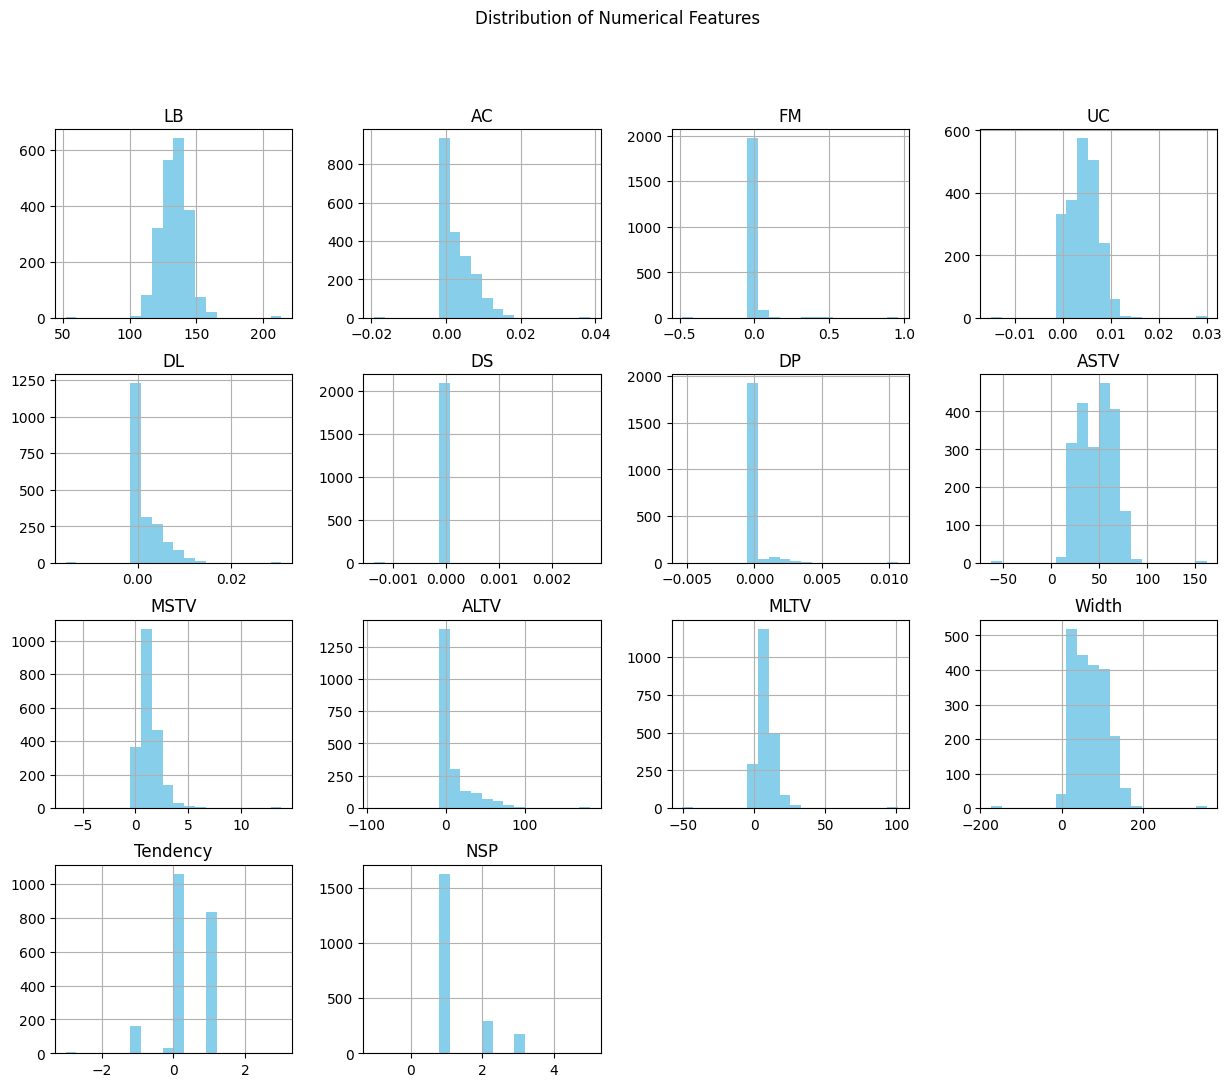

In [10]:
df.hist(figsize=(15, 12), bins=20, color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()

Boxplots

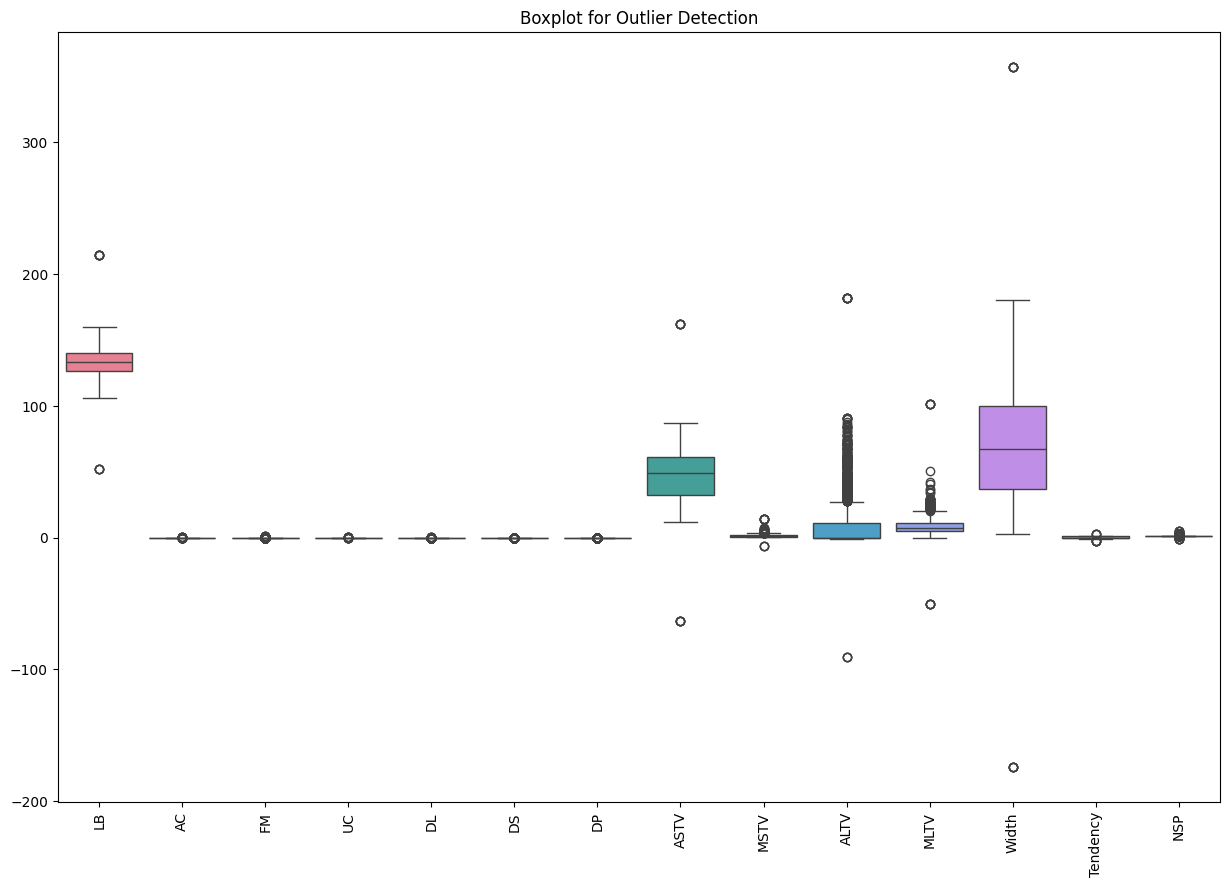

In [11]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


Correlation Heatmap

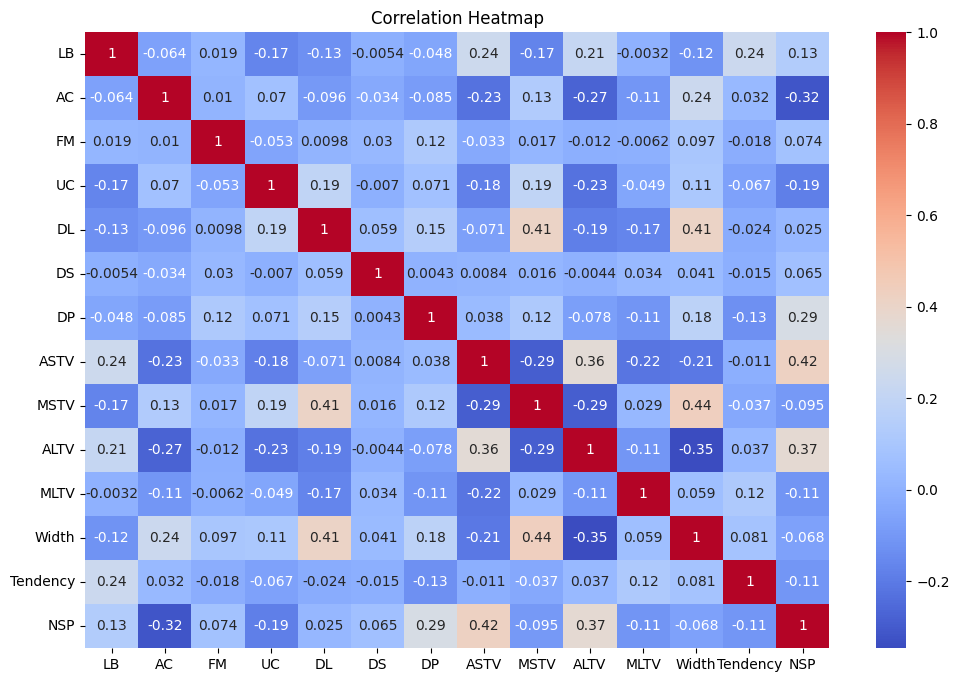

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Pairplot

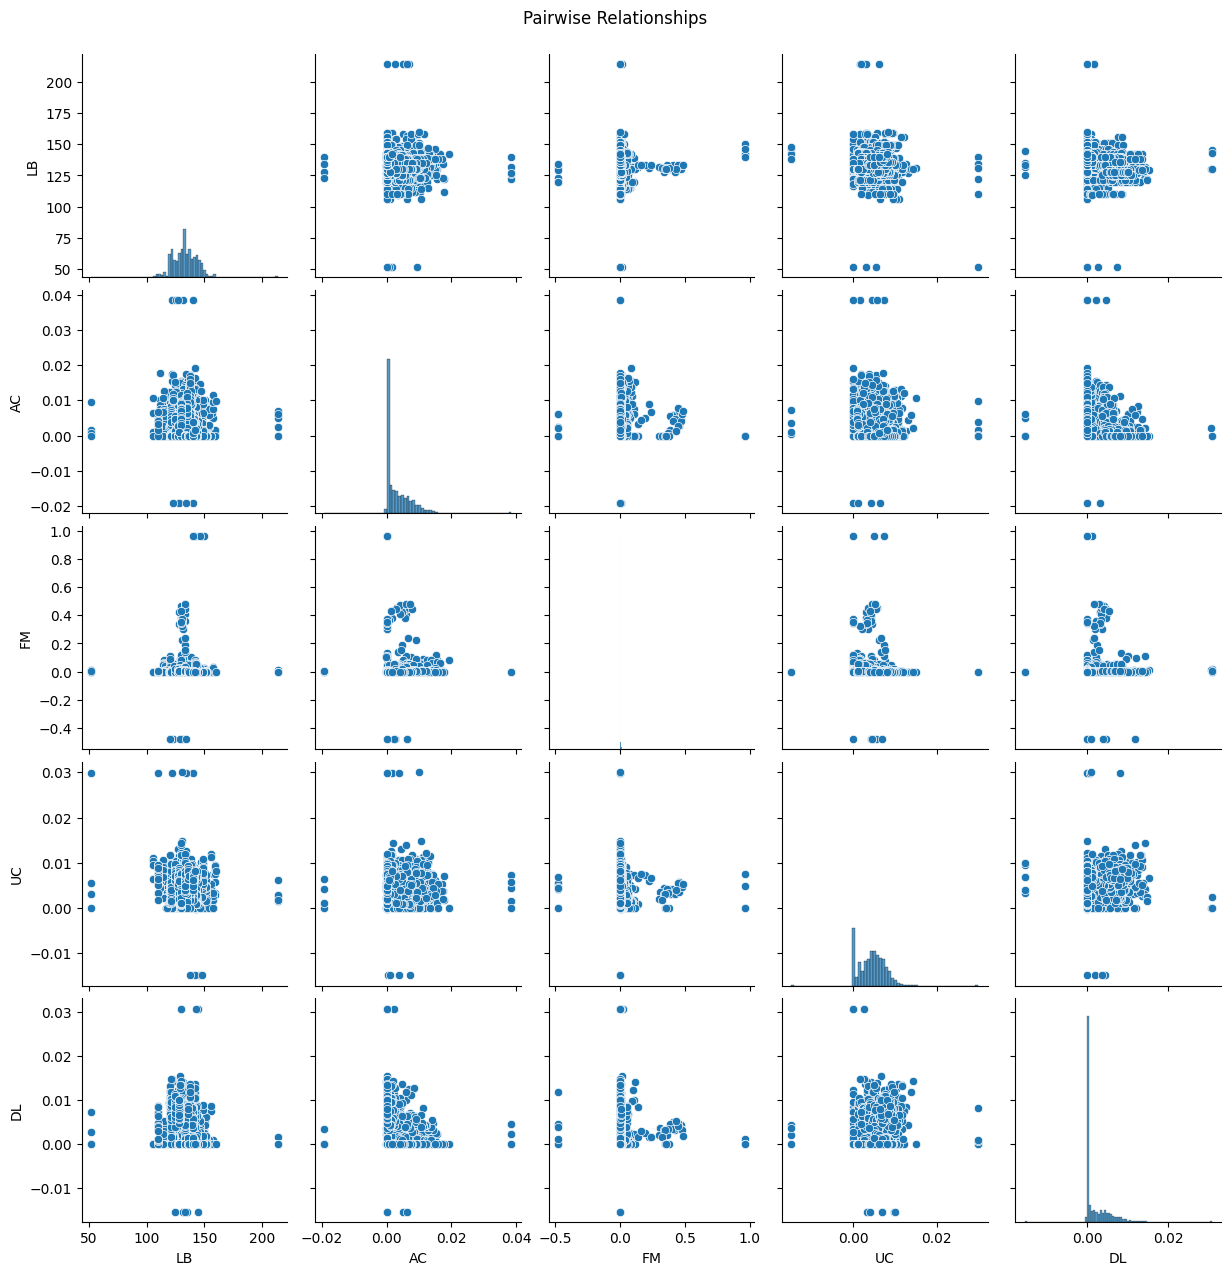

In [13]:
sns.pairplot(df.iloc[:, :5])  # limit to first few variables for clarity
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

Pairplot

Top correlated features

In [14]:
corr_matrix = df.corr().abs()
high_corr = corr_matrix[corr_matrix > 0.7]
print("High Correlations:\n", high_corr)


High Correlations:
            LB   AC   FM   UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN  1.0  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN  NaN  1.0  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN  NaN  NaN  1.0  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN  NaN  NaN  NaN  1.0  NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   1.0    NaN   
Width     NaN  NaN  NaN  NaN  NaN  NaN  NaN 

 Step 6: Conclusion

Main patterns observed.

Any variables that show strong correlations.

Outliers or skewed distributions.

How this data can guide medical evaluations or further ML modeling.

